In [1]:
import random
import numpy as np

random.seed(42)
np.random.seed(42)

random_number1 = random.random()
numpy_array1 = np.random.rand(3)

print(random_number1)
print(numpy_array1)

0.6394267984578837
[0.37454012 0.95071431 0.73199394]


In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import random

#데이터 준비
X = np.array([[1], [2], [3], [4], [5]]) # 독립 변수
y = np.array([2, 4, 5, 4, 5]) # 종속 변수

#데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

#예측 및 평가
predictions = model.predict(X_test)

#결과 출력
print("학습 데이터 크기:", X_train.shape[0])
print("테스트 데이터 크기:", X_test.shape[0])
print("모델 계수")
print("기울기(slope)", model.coef_[0])

print("절편(먹을거아님):", model.intercept_)
print("테스트 세트 실제 값", y_test)
print("테스트 세트 예측 값", predictions)
print("모델 성능")
print("R2 점수:", r2_score(y_test, predictions))
print("평균 제곱 오차(MSE):", mean_squared_error(y_test, predictions))



학습 데이터 크기: 3
테스트 데이터 크기: 2
모델 계수
기울기(slope) 0.7857142857142857
절편(먹을거아님): 1.5714285714285716
테스트 세트 실제 값 [4 5]
테스트 세트 예측 값 [3.14285714 5.5       ]
모델 성능
R2 점수: -0.9693877551020396
평균 제곱 오차(MSE): 0.4923469387755099


In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression


# 샘플 데이터
# 공부 시간과 과외시간에 따른 시험점수 예측
study_hours = np.array([2, 3, 4, 5, 4, 6, 7, 8, 5, 4]) #하루 공부 시간
tutor_hours = np.array([0, 1, 0, 2, 1, 3, 2, 3, 2, 1]) #주간 공부 시간
test_scores = np.array([60, 70, 75, 85, 75, 90, 92, 95, 80, 75]) #시험점수

# 입력 데이터 맞추기
X = np.column_stack((study_hours, tutor_hours))

y = test_scores

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 결과 출력
print("회귀 계수")
print(f"공부 시간: {model.coef_[0]:.2f}")
print(f"과외 시간: {model.coef_[1]:.2f}")
print(f"절편: {model.intercept_:.2f}")


회귀 계수
공부 시간: 4.87
과외 시간: 1.94
절편: 53.39


회귀 계수:
X1: 1.7882
X2: 2.9284
X3: 1.5135
절편: 0.1535
R-squared 값: 0.9566


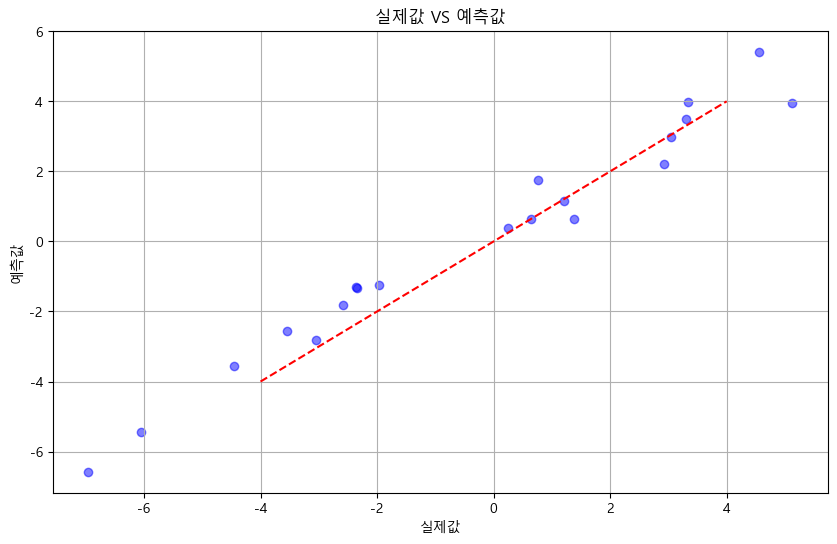


새로운 데이터 예측값: 3.2192


c:\Project\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

#마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

#숫자가 지수표현식으로 나올때 지정
pd.options.display.float_format = '{:.2f}'.format

#샘플 데이터 생성
np.random.seed(42)
n_samples = 100 #난수 크기

#독립변수 생성
X1 = np.random.normal(0, 1, n_samples) #(평균, 표준편차, 생성할 난수 크기)
X2 = np.random.normal(0, 1, n_samples)
X3 = np.random.normal(0, 1, n_samples)

#종속변수 생성 (Y = 2X1 + 3X2 + 1.5X3 + 오차)
Y = 2 * X1 + 3 * X2 + 1.5 * X3 + np.random.normal(0, 1, n_samples)

#데이터프레임 생성 
data = pd.DataFrame({
  'X1' : X1,
  'X2' : X2,
  'X3' : X3,
  'Y': Y  
})
  
  
# 학습용과 테스트용 데이터 분리
X = data[['X1', 'X2', 'X3']]  
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 출력
print("회귀 계수:")
for feature, coef in zip(X.columns, model.coef_):
  print(f"{feature}: {coef:.4f}")
print(f"절편: {model.intercept_:.4f}")
print(f"R-squared 값: {r2_score(y_test, y_pred):.4f}")


# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10,6))
plt.grid(True)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([-4, 4], [-4, 4], 'r--')
plt.grid(True)
plt.title('실제값 VS 예측값')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.show()

# 새로운 데이터로 예측 예시
new_data = np.array([[0.5, 1.0, -0.5]])
prediction = model.predict(new_data)
print(f"\n새로운 데이터 예측값: {prediction[0]:.4f}")